In [ ]:
import pymorphy2
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')

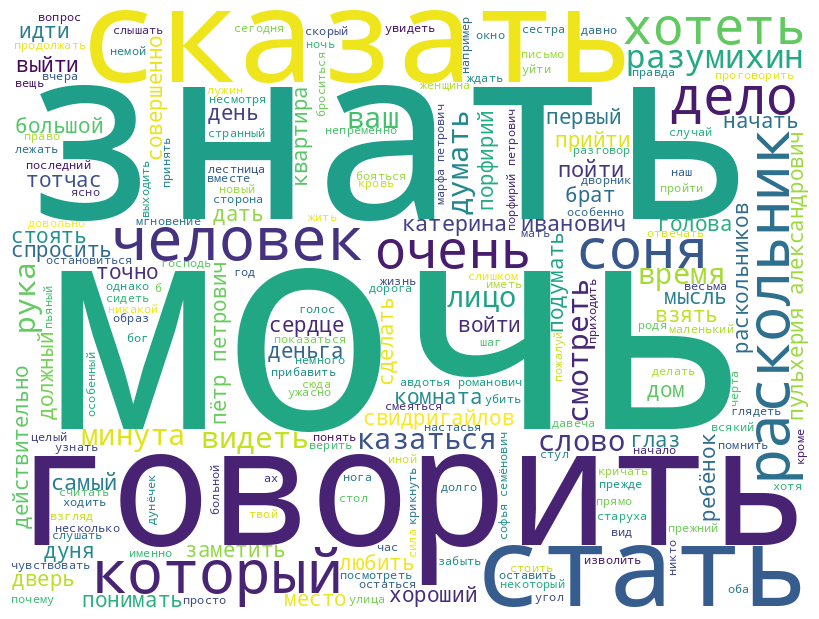

In [9]:
# Функция для чтения файла
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Функция для чтения списка стоп-слов из файла
def read_stop_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return [line.strip() for line in file]

# Функция для предобработки текста
def preprocess_text(text):
    morph = pymorphy2.MorphAnalyzer()
    russian_stopwords = read_stop_words(stopwords_file_path)
    words = word_tokenize(text.lower())
    lemmas = [morph.parse(word)[0].normal_form for word in words if word.isalpha()]
    return [lemma for lemma in lemmas if lemma not in russian_stopwords]

# Функция для создания Word Cloud
def create_wordcloud(words):
    text = ' '.join(words)
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)

    # Показать Word Cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig('wordcloud.png', format='png', dpi=600)
    plt.show()


# Путь к вашему файлу cо стоп-словами
stopwords_file_path = 'russian_stop_words.csv'

# Путь к вашему файлу для анализа
file_path = 'Prestuplenie_i_nakazanie.txt' # Укажите путь к вашему файлу

# Чтение и предобработка текста
text = read_file(file_path)
processed_text = preprocess_text(text)

# Вывод Word Cloud и сохранение изображения
create_wordcloud(processed_text)
